In [1]:
import numpy as np
import skimage
import imageio
import matplotlib.pyplot as plt

# Imports supplémentaires
import skimage.transform
from PIL import Image

# Exercice 1 : Imagerie de la rétine & Message secret
Les images à utiliser pour cet exercice sont `tp1_ex1_img1.tiff` et `tp1_ex1_img2.tiff`.

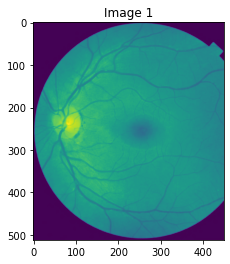

Taille:  (512, 448)
Format de pixel:  uint8
Intensité min et max:  0 220
Intensité moyenne:  96.18584769112724
Espace mémoire (bit):  229376 917504


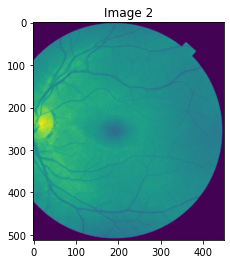

Taille:  (512, 448)
Format de pixel:  uint8
Intensité min et max:  0 221
Intensité moyenne:  95.02109636579242
Espace mémoire (bit):  229376 917504


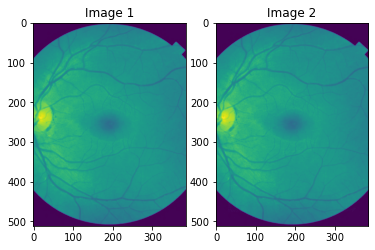

(512, 384)

Intensité de l'image 1: 1.0
Intensité de l'image 2: 1.0
Intensité de l'image 3: 0.004524886877828038


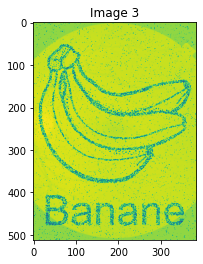

Taille:  (512, 384)
Format de pixel:  float64
Intensité min et max:  -0.02262443438914027 0.004524886877828038
Intensité moyenne:  0.0009824713316373011
Espace mémoire (bit):  196608 786432


In [2]:
### Lecture des fichers image
img1 = imageio.imread('tp1_ex1_img1.tiff')
img2 = imageio.imread('tp1_ex1_img2.tiff')

# Données Image1
plt.imshow(img1); plt.title("Image 1"); plt.show()
print('Taille: ', img1.shape)
print('Format de pixel: ', img1.dtype)
print('Intensité min et max: ', img1.min(), img1.max())
print('Intensité moyenne: ', img1.mean())
print('Espace mémoire (bit): ', img1.size, img1.shape[0] * img1.shape[1] * 4)

# Données Image2
plt.imshow(img2); plt.title("Image 2"); plt.show()
print('Taille: ', img2.shape)
print('Format de pixel: ', img2.dtype)
print('Intensité min et max: ', img2.min(), img2.max())
print('Intensité moyenne: ', img2.mean())
print('Espace mémoire (bit): ', img2.size, img2.shape[0] * img2.shape[1] * 4)

# Alligner les deux images l'une par dessus l'autre
# J'ai trouvé par essai-erreur, je ne savais pas comment programmer la mise l'une par dessus l'autre
img1 = img1[0:512, 64:448]
img2 = img2[0:512, 0:384]
plt.subplot(1,2,1); plt.imshow(img1); plt.title("Image 1")
plt.subplot(1,2,2); plt.imshow(img2); plt.title("Image 2")
plt.show()
print(img1.shape)

# Ajustement des intensités des images de base
img1 = img1 / img1.max()
img2 = img2 / img2.max()
print('\nIntensité de l\'image 1:', img1.max())
print('Intensité de l\'image 2:', img2.max())

# Calcul de l'Image3 et ajustement de son intensité
img3 = img1 - img2
print('Intensité de l\'image 3:', img3.max())

# Données Image3
plt.imshow(img3); plt.title("Image 3"); plt.show()
print('Taille: ', img3.shape)
print('Format de pixel: ', img3.dtype)
print('Intensité min et max: ', img3.min(), img3.max())
print('Intensité moyenne: ', img3.mean())
print('Espace mémoire (bit): ', img3.size, img3.shape[0] * img3.shape[1] * 4)

# Questions
## Pourquoi le message secret est-il imperceptible?
Parce que l'intensité du message a été changée et vu qu'il a été fusionné avec l'image de base, l'oeil n'est pas capable de le voir.
## Comment cette image a-t-elle été créée?
On pense que l'intensité de l'image a été diminuée et elle a été fusionnée à l'image de base.

# Exercice 2 : Avatar UQAM
- Vous devez utiliser l'image `tp1_ex2_logo.tiff` ainsi qu'une photo de vous-même pour cet exercice.

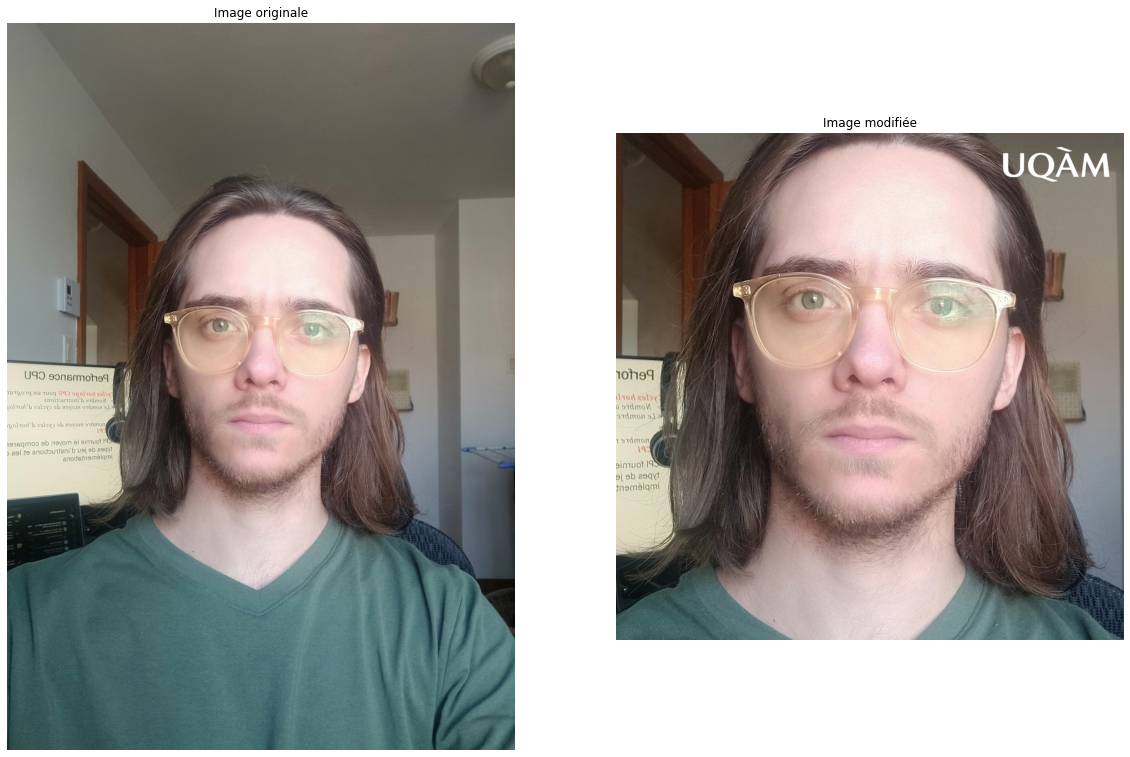

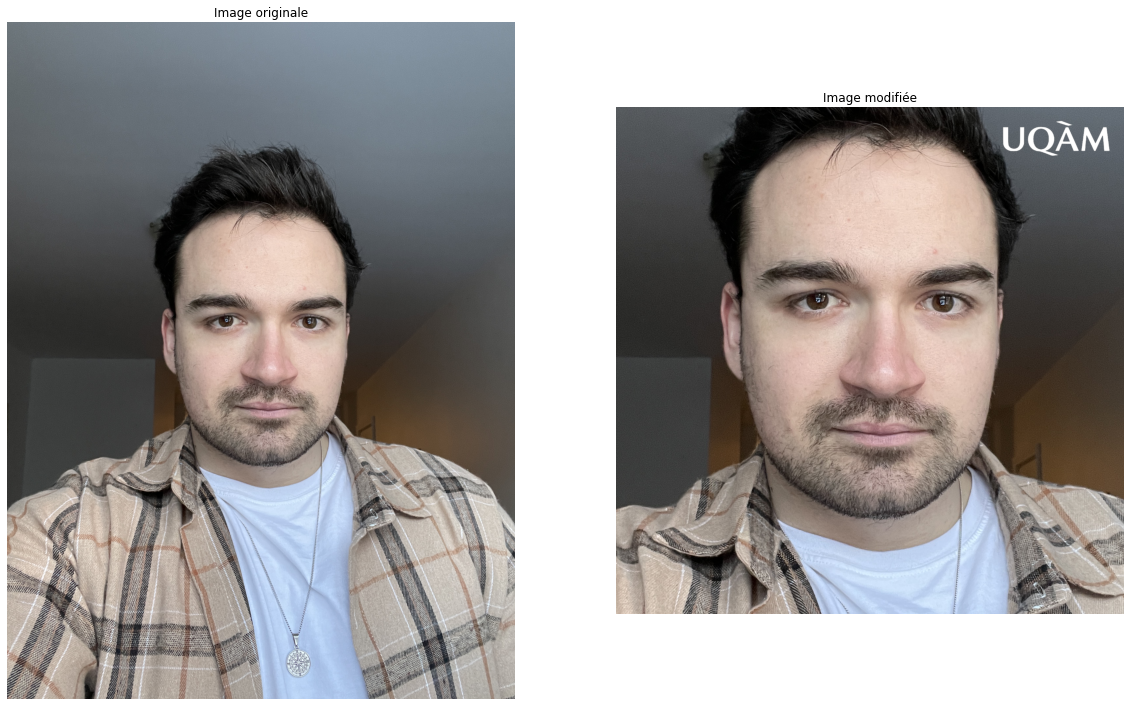

In [3]:
def creation_profil(input_file, output_file, centre, s):
    """TP1/Ex3 : Création d'une photo de profil UQAM.
    Paramètres
    ----------
    input_file : str
        Chemin vers l'image originale
    output_file : str
        Chemin vers l'image modifiée
    centre : tuple (2,)
        Tuple ou liste de longueur 2 contenant les coordonnées (r,c) du centre du visage
    s : int
        Taille de la photo de profil en pixel
    """
    #Variables
    ifile = imageio.imread(input_file)
    ofile = input_file[:-4] + '_uqam.jpg'
    logo = imageio.imread('tp1_ex2_logo.tiff')
    
    #Rogner les dimensions selon le centre donné en paramètre
    crop_largeur = centre[0]
    crop_longueur = centre[1]
    milieu_x = int(ifile.shape[1]/2)
    milieu_y = int(ifile.shape[0]/2)
    c_la2 = int(crop_largeur/2)
    c_lo2 = int(crop_longueur/2)
    crop_img = ifile[milieu_y - c_lo2 : milieu_y + c_lo2, milieu_x - c_la2 : milieu_x + c_la2]
    
    #Ajuster logo
    logo = skimage.transform.resize(logo, crop_img.shape)
    logo_max = ((logo/np.max(logo))*255).astype(np.uint8)

    #Combiner les images
    resultat = np.maximum(crop_img,logo_max)
    
    #Enregistrer l'image
    imageio.imsave(ofile, resultat)
    
    #Afficher les résultats
    plt.figure(figsize=(20, 20))
    plt.subplot(121); plt.imshow(ifile); plt.title("Image originale"); plt.axis('off')
    plt.subplot(122); plt.imshow(resultat); plt.title("Image modifiée"); plt.axis('off')
    plt.show()

creation_profil('profil_PedroLuisBernardos.jpg', '0', (1700, 1700), 2)
creation_profil('profil_YanAlexandreLeclerc.jpg', '0', (1544, 1544), 2)

In [ ]:
# Votre solution ici. Ajoutez des cellules si nécessaire

# Exercice 3 : Code-barres mystère
L'image à utiliser pour cet exercice est `tp1_ex3_livre_mystere.png`.

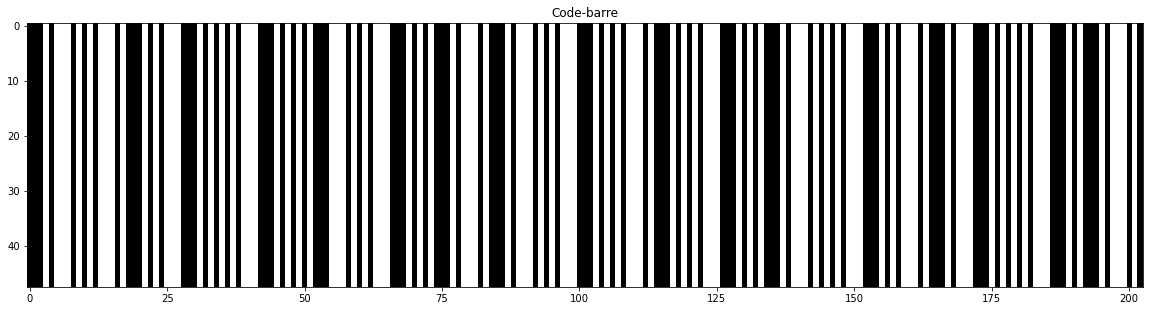

L'ISBN est: 978-1-4987-4028-9
Le livre est: Image Processing Handbook
Les auteurs sont: F. Brent Neal, John C. Russ 


In [4]:
dictionnaire = {'0': [0,0,0,0,0,1,1],
                '1': [0,0,0,0,1,1,0],
                '2': [0,0,0,1,0,0,1],
                '3': [1,1,0,0,0,0,0],
                '4': [0,0,1,0,0,1,0],
                '5': [1,0,0,0,0,1,0],
                '6': [0,1,0,0,0,0,1],
                '7': [0,1,0,0,1,0,0],
                '8': [0,1,1,0,0,0,0],
                '9': [1,0,0,1,0,0,0],
                '-': [0,0,0,1,1,0,0],
                '$': [0,0,1,1,0,0,0]}

def motifToCode(array):
    listeMotifs = []
    compteur = 0
    
    for i in range(len(array)):
        iterator = iter(array[i])
        c = 0
        motif = []
        for j in iterator:
            if ((c < 9) and (array[i][c] == array[i][c+1]) and (array[i][c+1] == array[i][c+2])):
                motif.append(1)
                compteur = 2
            else:
                if compteur == 0:
                    motif.append(0)
                else:
                    compteur = compteur - 1
            c = c + 1
        listeMotifs.append(motif)
    return listeMotifs

def motifToISBN(array):
    isbn = ""
    for i in range(len(array)):
        for key, value in dictionnaire.items():
            if np.array_equal(array[i], value):
                isbn = isbn + key
    return isbn

def decoder(input_file):
    """TP1/Ex3 : Décodeur de code-barre.
    Paramètres
    ----------
    input_file : str
        Chemin vers l'image code-barre
    """
    ifile = imageio.imread(input_file)
    #Enlever le contour blanc
    ifile = ifile[8:56, 8:211]
    
    motif = []
    listeMotifs = []
    
    x = 0 #peut être n'importe quoi vu que les barres sont identiques pour tout y
    for i in range(len(ifile[x])):
        if (len(motif) == 11):
            listeMotifs.append(motif)
            motif = []
        else:
            motif.append(ifile[x][i])
    listeMotifs.append(motif)
    
    arrayCode = motifToCode(listeMotifs)
    
    plt.figure(figsize=(20, 20))
    plt.imshow(ifile, cmap='gray'); plt.title("Code-barre"); plt.show()
    
    isbn = motifToISBN(arrayCode)
    print("L'ISBN est:",isbn)

decoder('tp1_ex3_livre_mystere.png')
print("Le livre est: Image Processing Handbook")
print("Les auteurs sont: F. Brent Neal, John C. Russ ")